In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob

In [2]:
def mean_and_std(data):
    trials = len(data)
    mean   = np.mean(data, axis=0)
    std    = np.std(data, axis=0)/np.sqrt(trials-1)
    return mean, std
def chop(a, warn = True):
    A = np.round(np.real(a),3)
    if np.all(np.isclose(A.astype(int), A)): return A.astype(int)
    else: return A

### Get Data

In [21]:
L = 13
end = 20
n = 3
stop = n*end

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = .2
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")
# fnames = fnames[4:5]

In [22]:
trials = len(fnames)
weights_site = np.zeros((trials, 2, L,   end*n))
weights_bond = np.zeros((trials, 2, L-1, end*n))
peakses_site = np.zeros((trials, 2, L))
peakses_bond = np.zeros((trials, 2, L-1))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname) # Other data are otocs
    
    for i in range(L):
        data = weightfore[i]
        for jdx, val in enumerate(data):
            if (jdx == 0): continue
            if (val > data[jdx+1]): peakses_site[idx,0,i] = jdx; break
            if (jdx == stop-2): peakses_site[idx,0,i] = stop-1; print("Reached cutoff", i); break
        weights_site[idx,0,i] = data
        
        data = weightback[i]
        for jdx, val in enumerate(data):
            if (jdx == 0): continue
            if (val > data[jdx+1]): peakses_site[idx,1,i] = jdx; break
            if (jdx == stop-2): peakses_site[idx,1,i] = stop-1; print("Reached cutoff", i); break
        weights_site[idx,1,i] = data

    for i in range(L-1):
        data = (weightfore[i]+weightfore[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_bond[idx,0,i] = jdx; break
            if (jdx == stop-2): peakses_bond[idx,0,i] = stop-1; print("Reached cutoff", i); break
        weights_bond[idx,0,i] = data
        
        data = (weightback[i]+weightback[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peakses_bond[idx,1,i] = jdx; break
            if (jdx == stop-2): peakses_bond[idx,1,i] = stop-1; print("Reached cutoff", i); break
        weights_bond[idx,1,i] = data

Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 0
Reached cutoff 1
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11


### At Sites

Reached cutoff 13


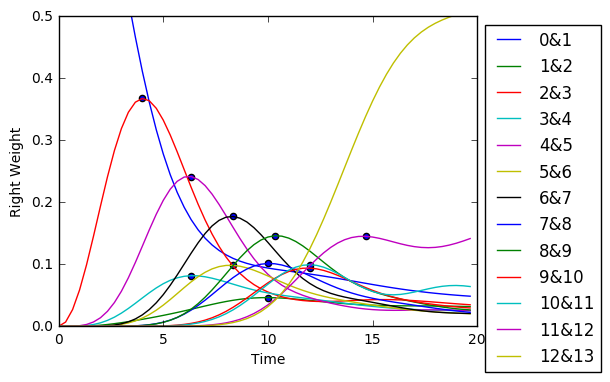

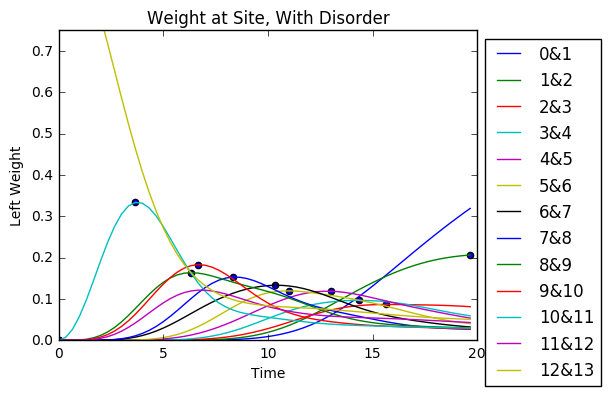

In [23]:
avg_weight, std_weight = mean_and_std(weights_site)

stop = n*end
peaks = np.zeros((2,L))
ax = plt.subplot(111)
for i in range(L):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (jdx == 0): continue
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == stop-2): peaks[0,i] = stop-1; print("Reached cutoff", L); break
    peaks[0,0] = 0
    if (i%1==0 and i < 15): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
# ax.legend(loc=1)
plt.ylim(0,.5)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
# plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgRweightL13_s.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == stop-2): peaks[1,i] = stop-1; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgLweightL13_s.pdf')
plt.show()

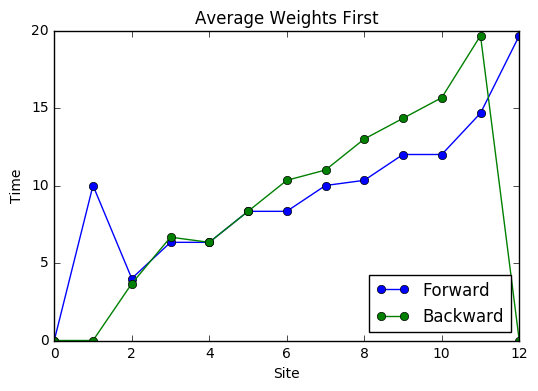

In [24]:
plt.plot(range(L),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1s.pdf')
plt.show()

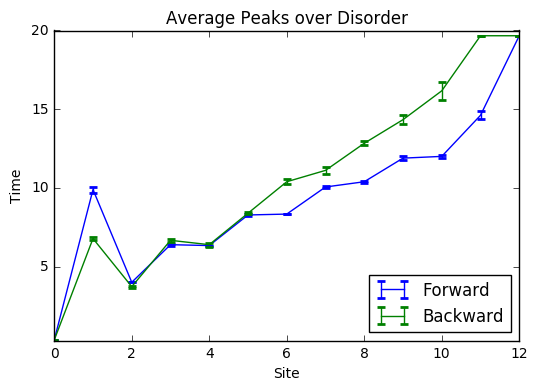

In [25]:
avg_peaks, std_peaks = mean_and_std(peakses_site)
plt.errorbar(range(L),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L),avg_peaks[1][::-1]/n, yerr=std_peaks[1][::-1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.ylim(0.3)
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2s.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

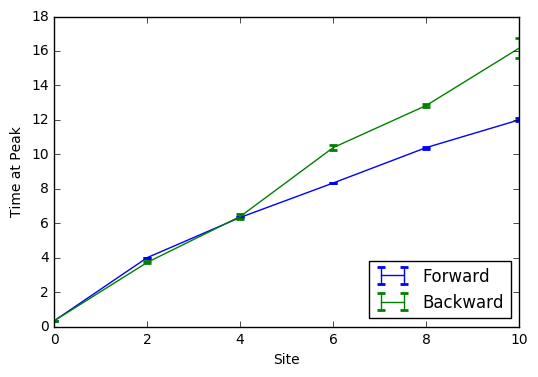

In [28]:
mask = np.arange(0,L-1,2)
avg_peaks, std_peaks = mean_and_std(peakses_site)
# for peaks in peakses_site:
    
avg_peaks[1] = avg_peaks[1][::-1]
std_peaks[1] = std_peaks[1][::-1]
plt.errorbar(np.arange(L)[mask],avg_peaks[0][mask]/n, yerr=std_peaks[0][mask]/n, capthick=2, label="Forward")
plt.errorbar(np.arange(L)[mask],avg_peaks[1][mask]/n, yerr=std_peaks[1][mask]/n, capthick=2, label="Backward")
plt.ylabel('Time at Peak')
plt.xlabel('Site')
plt.legend(loc=4)
# plt.title('Average Peaks over Disorder')
plt.savefig('figures/avgPeaksL13_h'+str(field_strength)+'.pdf')
plt.show()

In [25]:
print(peaks/n)
print(chop(avg_peaks/n))

[[ 0.          8.          4.66666667  8.33333333  8.33333333 12.
  12.         18.33333333 19.66666667 19.66666667 19.66666667 19.66666667
   0.        ]
 [19.66666667 19.66666667 19.66666667 19.66666667 19.66666667 17.66666667
  14.33333333 12.33333333  8.66666667  7.66666667  4.          0.
   0.        ]]
[[ 0.     6.867  4.267  7.933  7.4   13.267 12.333 17.667 17.733 19.667
  19.667 19.667 11.8  ]
 [ 0.     4.8    4.467  7.6    9.267 11.4   15.2   17.8   19.467 19.667
  19.667 15.733 19.667]]


### At Bonds

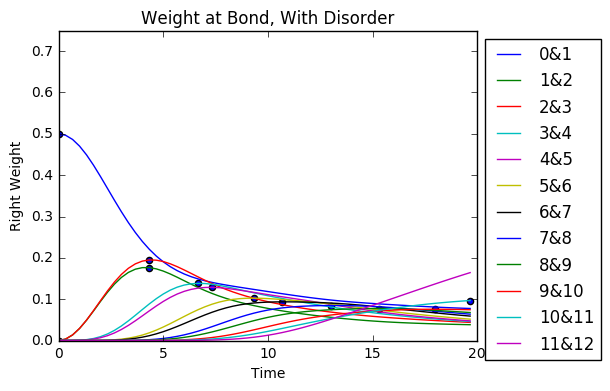

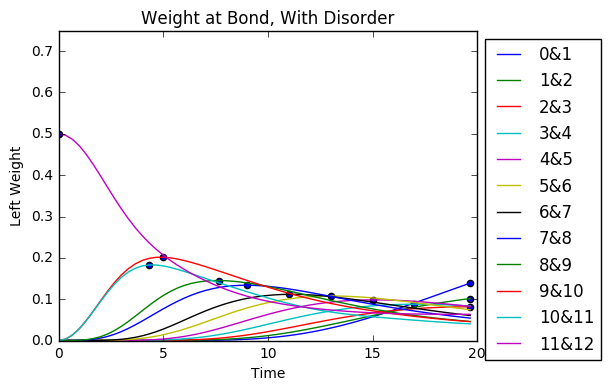

In [13]:
avg_weight, std_weight = mean_and_std(weights_bond)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgRweightL13_b.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgLweightL13_b.pdf')
plt.show()

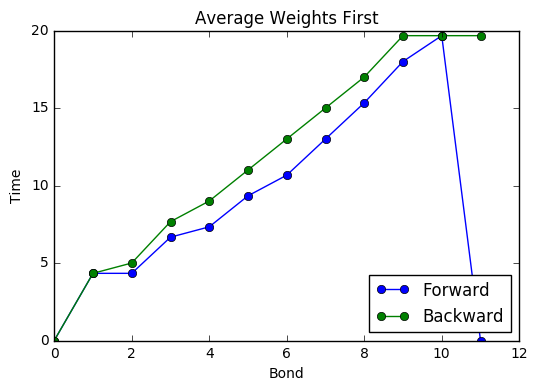

In [14]:
plt.plot(range(L-1),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1b.pdf')
plt.show()

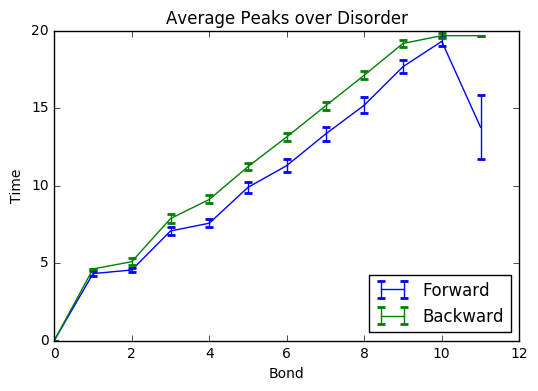

In [15]:
avg_peaks, std_peaks = mean_and_std(peakses_bond)
plt.errorbar(range(L-1),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L-1),avg_peaks[1][::-1]/n, yerr=std_peaks[1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2b.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [12]:
print(peaks/n)
print(chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.05  1.1   1.3   1.4   1.5   1.7   2.95]
 [ 2.95  2.65  1.95  1.7   1.55  1.35  1.15  1.    0.8   0.55  0.5   0.  ]]
[[ 0.     0.5    0.55   0.8    0.862  1.05   1.112  1.3    1.375  1.512
   1.912  2.2  ]
 [ 2.95   2.712  2.     1.75   1.575  1.375  1.162  0.988  0.812  0.55
   0.525  0.   ]]


In [109]:
data[1:]

array([0.99309364, 0.97282355, 0.9404783 , 0.89802313, 0.84786484,
       0.79258856, 0.73470947, 0.67647327, 0.61972338, 0.56583817,
       0.51572964, 0.46988813, 0.42845622, 0.39131569, 0.35817504,
       0.32864822, 0.30231859, 0.2787856 , 0.25769396, 0.23874712,
       0.22170874, 0.20639578, 0.19266718, 0.18041113, 0.16953326,
       0.15994685, 0.15156578, 0.14430011, 0.13805395, 0.13272534,
       0.12820749, 0.12439113, 0.12116749, 0.11843175, 0.11608648,
       0.11404496, 0.11223387, 0.11059525, 0.10908718, 0.10768337,
       0.10637129, 0.10514944, 0.10402385, 0.10300456, 0.10210232,
       0.10132609, 0.10068128, 0.10016898, 0.09978576, 0.09952411,
       0.09937311, 0.09931927, 0.09934735, 0.09944098, 0.09958328,
       0.0997573 , 0.09994644, 0.10013502, 0.10030893])